Steps Statistics:
count    57928.000000
mean       303.528904
std        560.602875
min          0.000000
25%          0.000000
50%         83.891495
75%        368.449550
max       6124.954100
Name: steps, dtype: float64

Sleep Statistics:
count    57928.000000
mean        17.878677
std         26.482681
min          0.000000
25%          0.000000
50%          0.000000
75%         60.000000
max         60.000000
Name: sleep, dtype: float64

Heartrate Statistics:
count    54409.000000
mean        78.903074
std         13.426584
min         45.463492
25%         68.894811
50%         77.742151
75%         87.557717
max        139.439355
Name: heartrate, dtype: float64


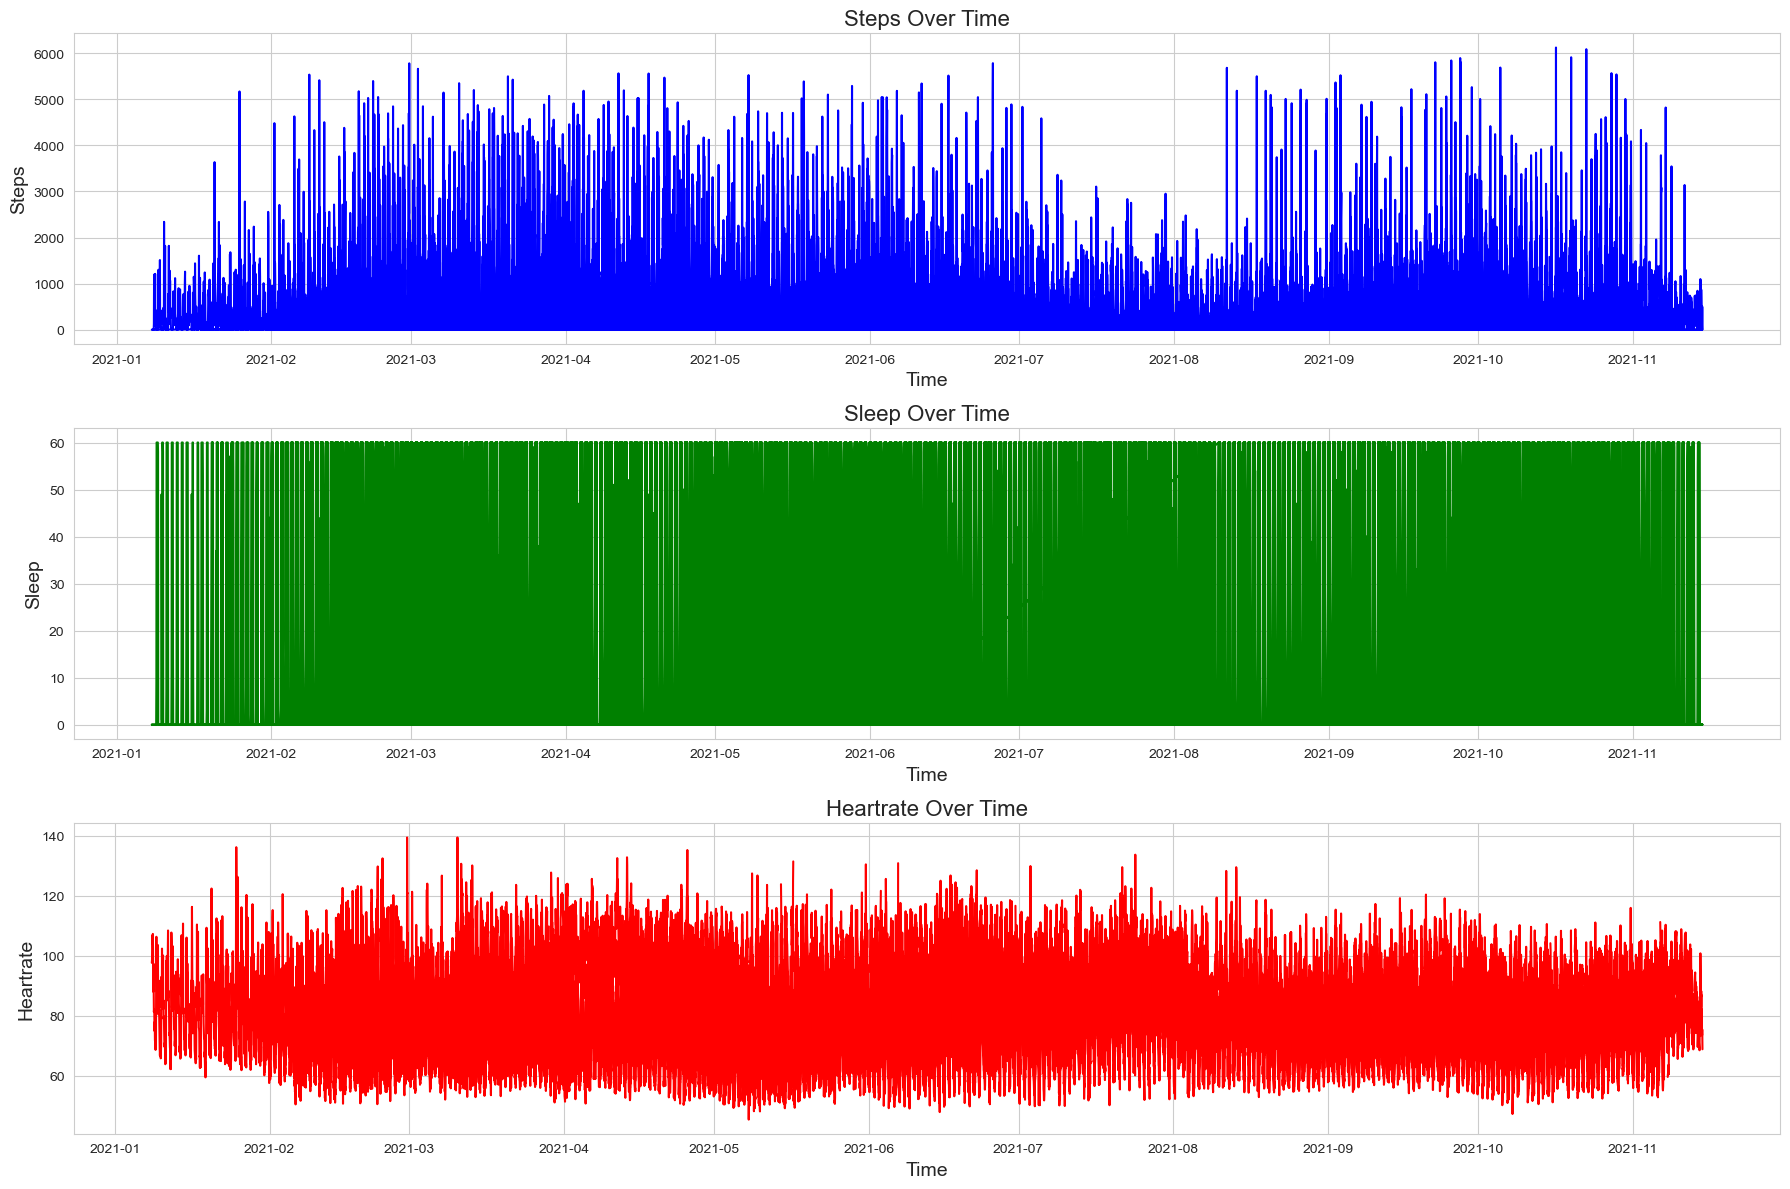

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Convert 'time' column to datetime
combined_df['time'] = pd.to_datetime(combined_df['time'])

# General statistics
steps_stats = combined_df['steps'].describe()
sleep_stats = combined_df['sleep'].describe()
heartrate_stats = combined_df['heartrate'].describe()

# Display statistics
print("Steps Statistics:")
print(steps_stats)
print("\nSleep Statistics:")
print(sleep_stats)
print("\nHeartrate Statistics:")
print(heartrate_stats)

# Plotting
plt.figure(figsize=(18, 12))

# Steps plot
plt.subplot(3, 1, 1)
plt.plot(combined_df['time'], combined_df['steps'], label='Steps', color='blue')
plt.title('Steps Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Steps', fontsize=14)
plt.grid(True)

# Sleep plot
plt.subplot(3, 1, 2)
plt.plot(combined_df['time'], combined_df['sleep'], label='Sleep', color='green')
plt.title('Sleep Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sleep', fontsize=14)
plt.grid(True)

# Heartrate plot
plt.subplot(3, 1, 3)
plt.plot(combined_df['time'], combined_df['heartrate'], label='Heartrate', color='red')
plt.title('Heartrate Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Heartrate', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


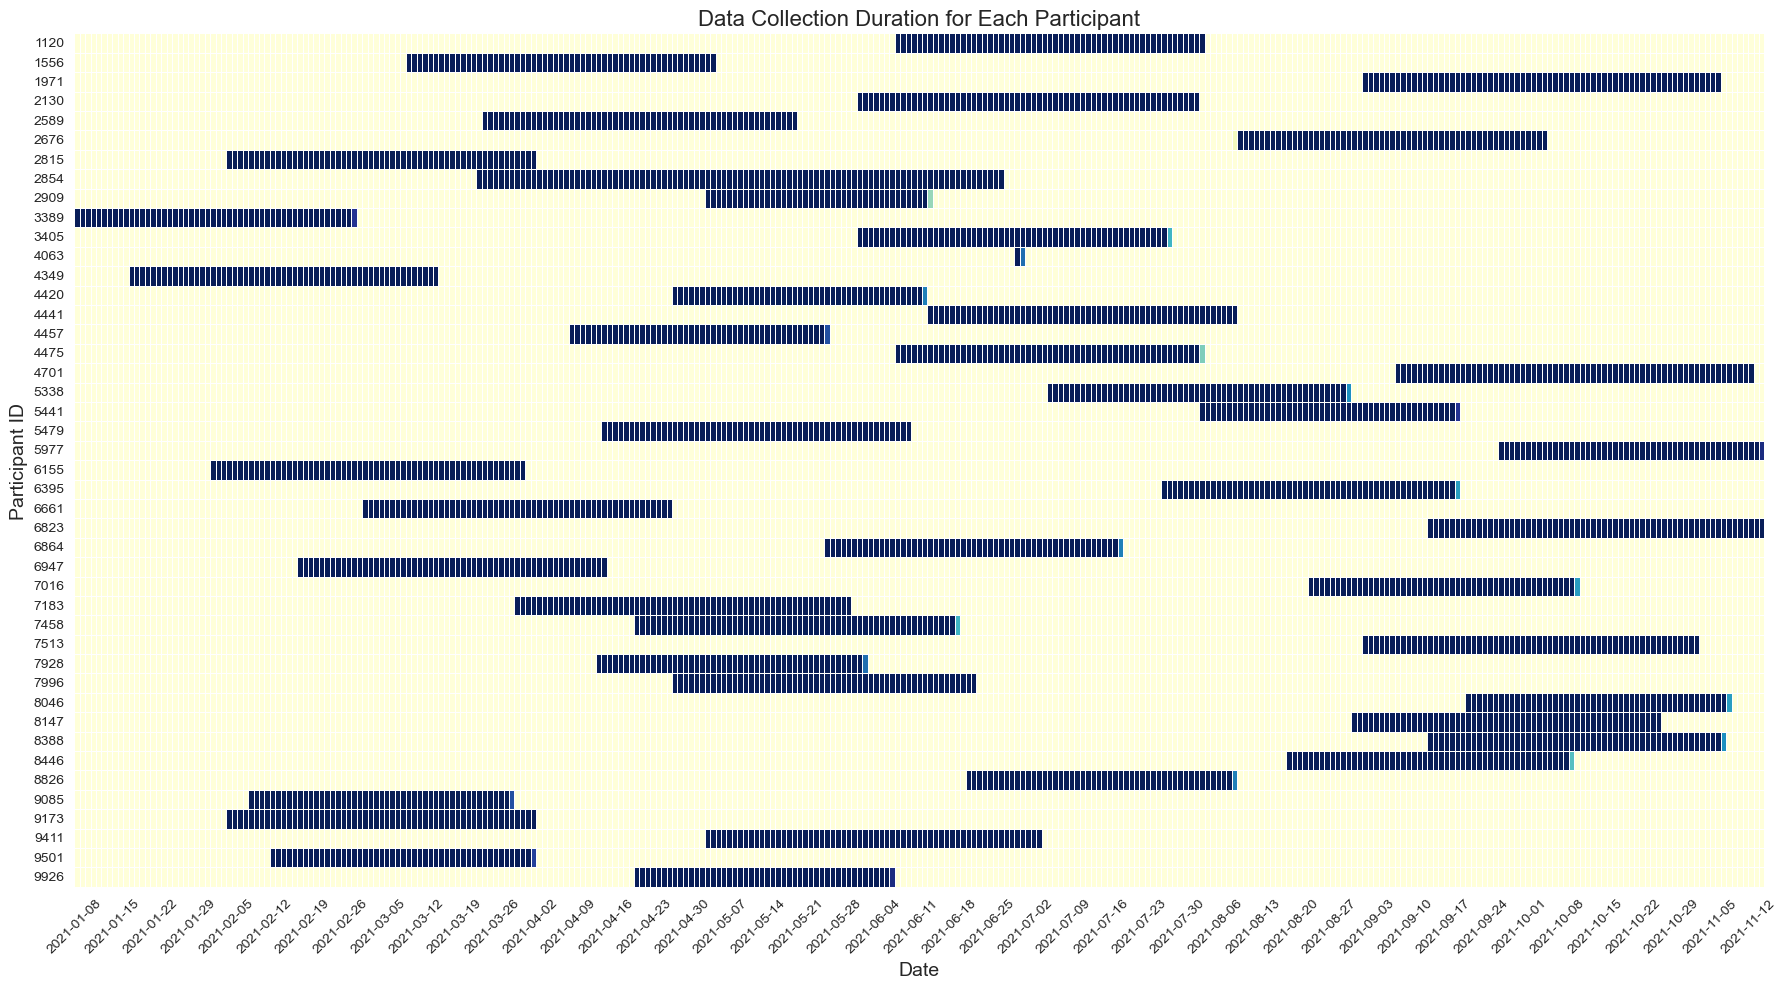

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    df['time'] = pd.to_datetime(df['time'])
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract date from time
combined_df['date'] = combined_df['time'].dt.date

# Create a pivot table with participants as rows and dates as columns
pivot_table = combined_df.pivot_table(index='participant_id', columns='date', values='steps', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(18, 10))
ax = sns.heatmap(pivot_table, cmap='YlGnBu', cbar=False, linewidths=.5)

plt.title('Data Collection Duration for Each Participant', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Participant ID', fontsize=14)

# Set x-ticks to display every 7th day
dates = pivot_table.columns
xtick_labels = [date for i, date in enumerate(dates) if i % 7 == 0]
xtick_positions = [i for i in range(len(dates)) if i % 7 == 0]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=45)

plt.tight_layout()
plt.show()


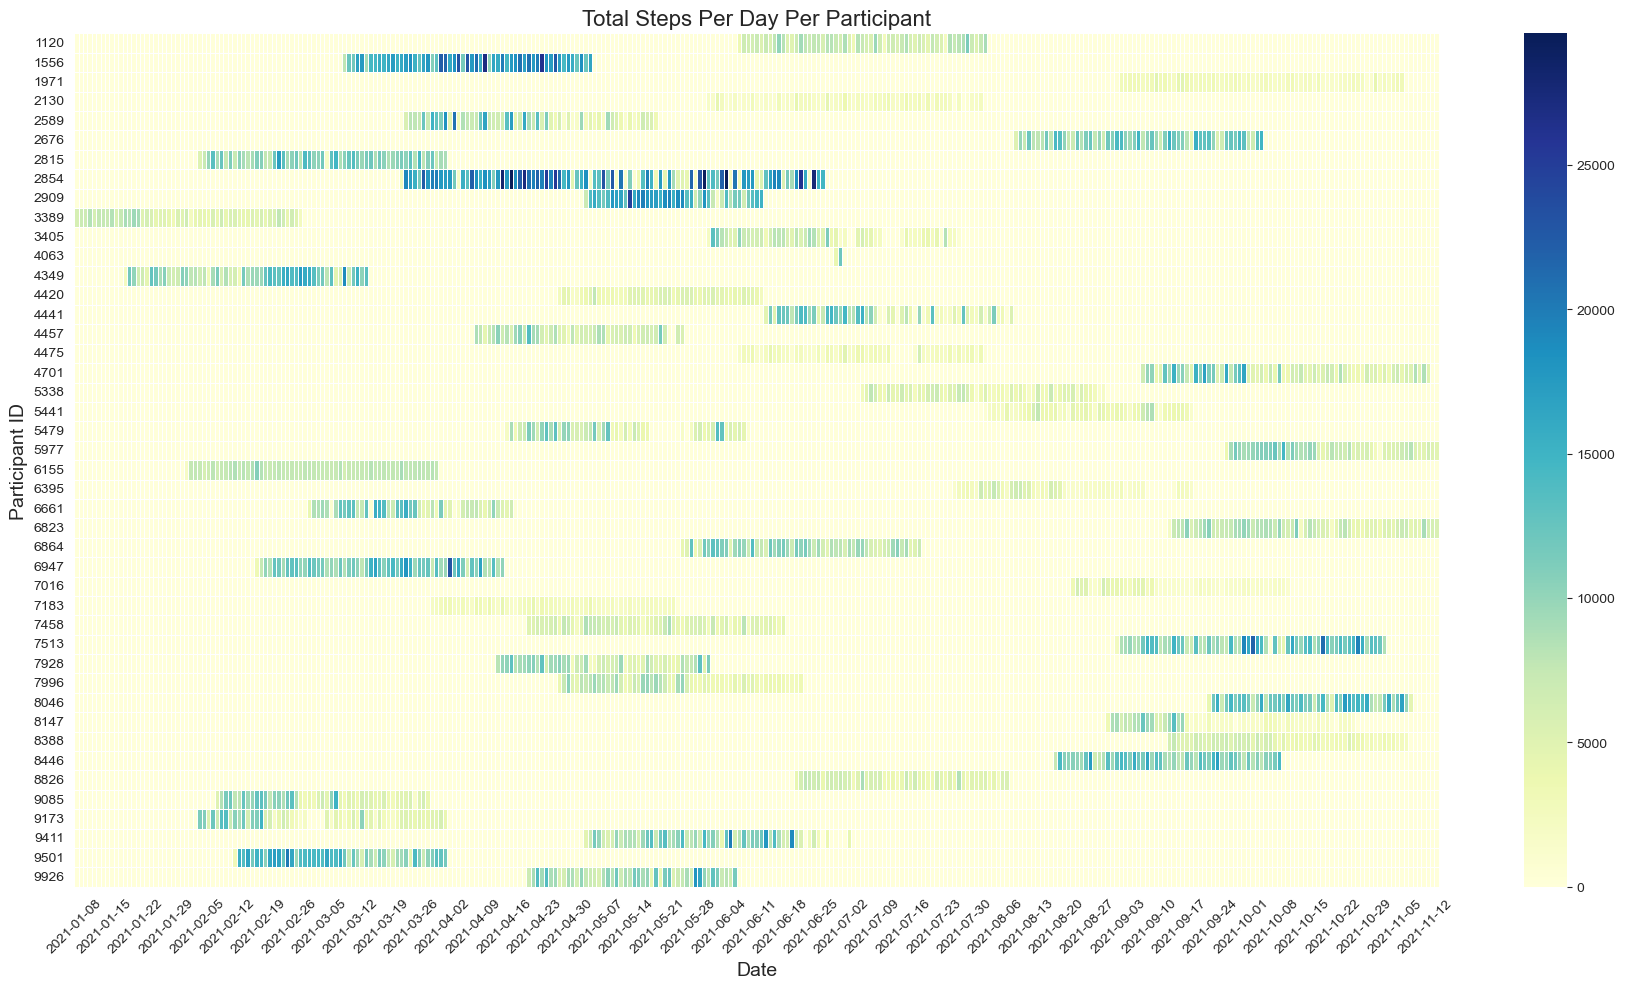

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    df['time'] = pd.to_datetime(df['time'])
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract date from time
combined_df['date'] = combined_df['time'].dt.date

# Create a pivot table with participants as rows and dates as columns
pivot_table = combined_df.pivot_table(index='participant_id', columns='date', values='steps', aggfunc='sum', fill_value=0)

# Plotting
plt.figure(figsize=(18, 10))
ax = sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True, linewidths=.5)

plt.title('Total Steps Per Day Per Participant', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Participant ID', fontsize=14)

# Set x-ticks to display every 7th day
dates = pivot_table.columns
xtick_labels = [date for i, date in enumerate(dates) if i % 7 == 0]
xtick_positions = [i for i in range(len(dates)) if i % 7 == 0]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=45)

plt.tight_layout()
plt.show()


In [5]:
pivot_table

date,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,...,2021-11-05,2021-11-06,2021-11-07,2021-11-08,2021-11-09,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14
participant_id,,,,,,,,,,,,,,,,,,,,,
1120,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1556,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,3027.927165,3063.045053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2130,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2589,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2676,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2815,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2854,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2909,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


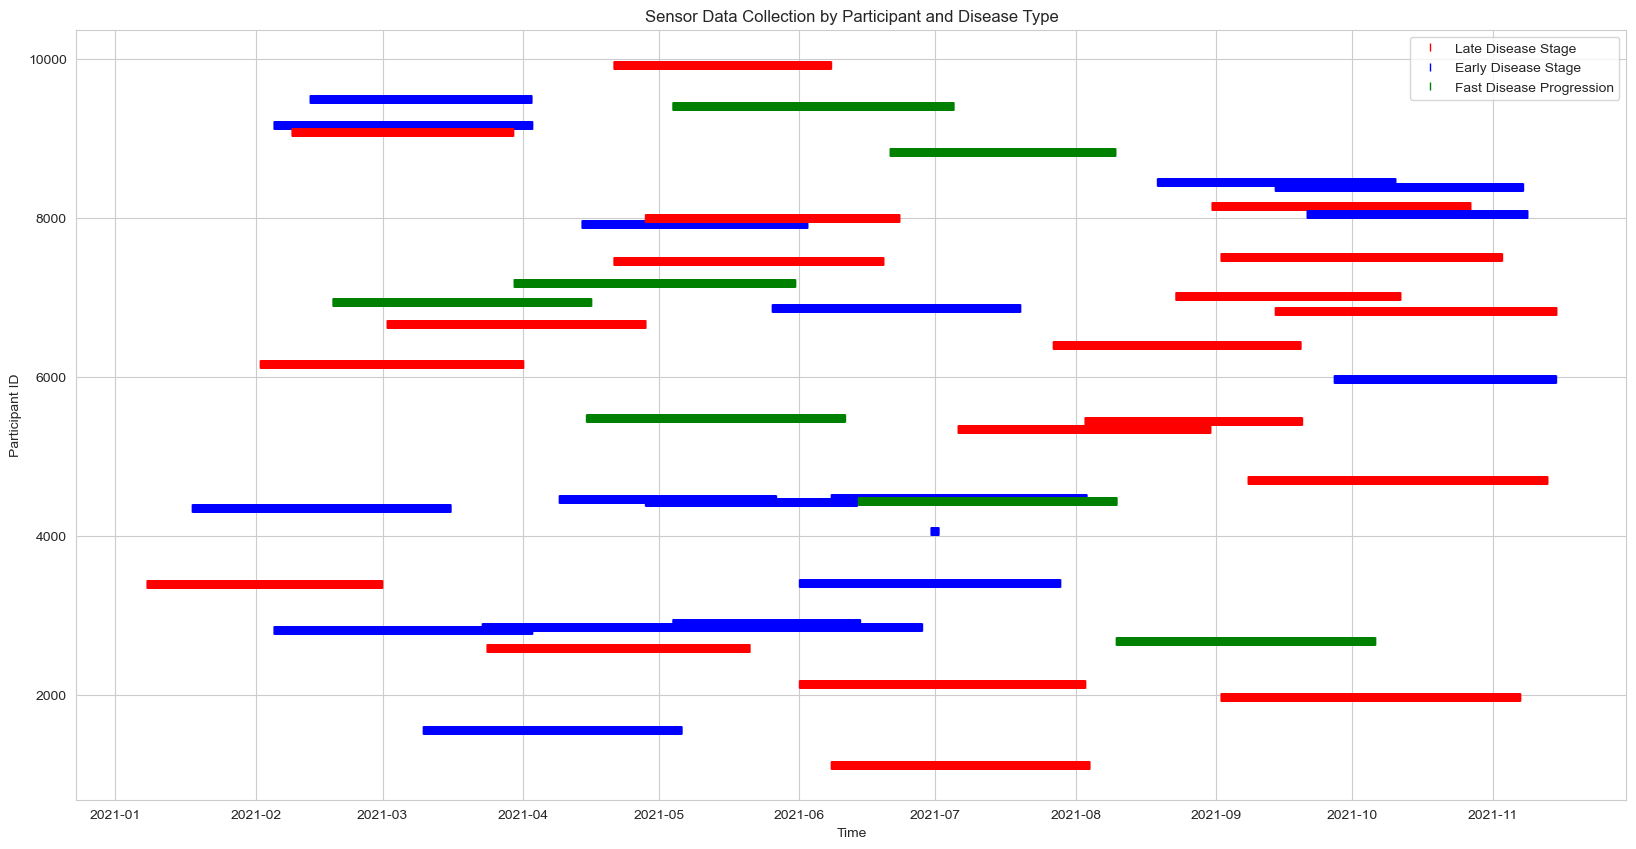

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a dictionary to store data for each participant
participant_data = {}

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        participant_data[participant_id] = data

# Define colors for each disease type
colors = {
    'Late Disease Stage': 'red',
    'Early Disease Stage': 'blue',
    'Fast Disease Progression': 'green'
}

# Create a plot
plt.figure(figsize=(20, 10))

# Plot each participant's data
for participant_id, data in participant_data.items():
    disease_type = data['disease_type'].iloc[0]
    color = colors[disease_type]
    plt.plot(data['time'], [participant_id] * len(data), '|', color=color, label=disease_type)

# Create legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Participant ID')
plt.title('Sensor Data Collection by Participant and Disease Type')

# Show the plot
plt.show()


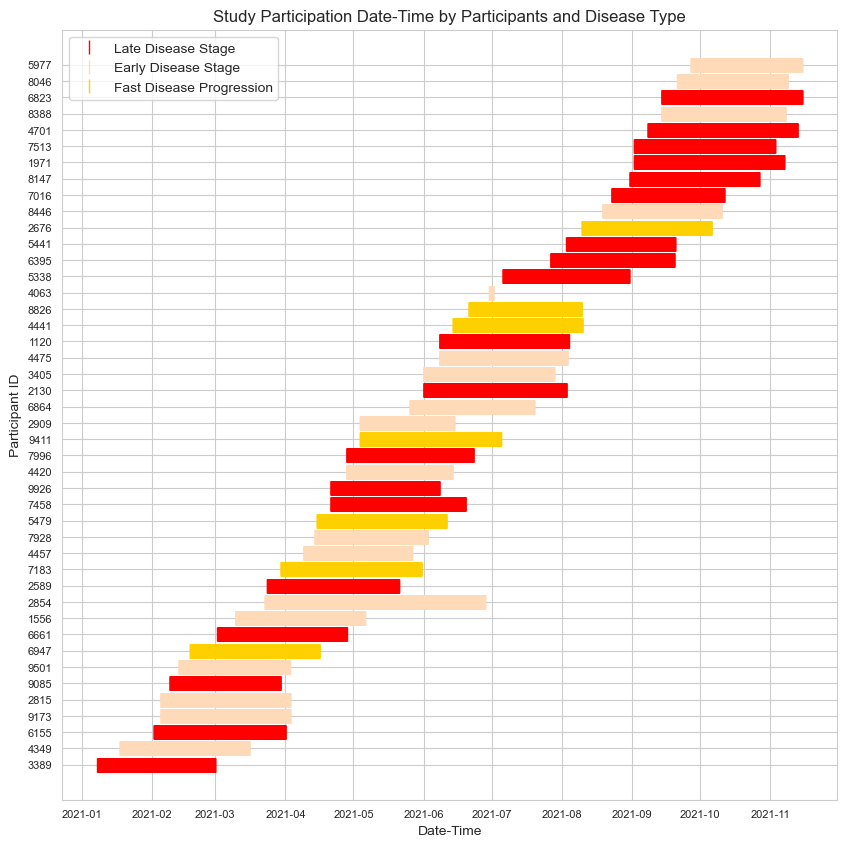

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a dictionary to store data for each participant
participant_data = {}

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        participant_data[participant_id] = data

# Define colors for each disease type
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Create a plot
plt.figure(figsize=(10, 10))

# Generate y-tick positions for each participant
y_positions = {participant_id: index for index, participant_id in enumerate(participant_data.keys())}

# Plot each participant's data with thicker bars
for participant_id, data in participant_data.items():
    disease_type = data['disease_type'].iloc[0]
    color = colors[disease_type]
    y_position = y_positions[participant_id]
    plt.plot(data['time'], [y_position] * len(data), '|', color=color, markersize=10, label=disease_type)

# Create legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.xlabel('Date-Time')
plt.ylabel('Participant ID')
plt.title('Study Participation Date-Time by Participants and Disease Type')

# Set y-ticks to show each participant ID
plt.yticks(ticks=list(y_positions.values()), labels=list(y_positions.keys()), rotation=0, fontsize=8)
plt.xticks(fontsize=8)

# Show the plot
plt.show()


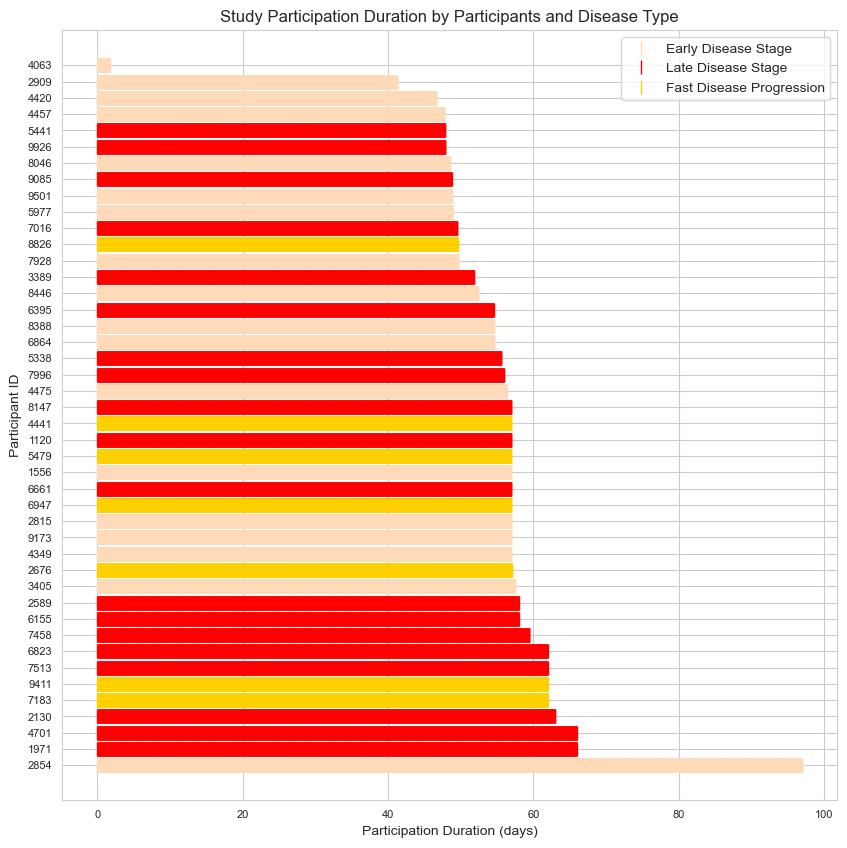

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a dictionary to store data for each participant
participant_data = {}

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        participant_data[participant_id] = data

# Normalize the start times and calculate durations
for participant_id, data in participant_data.items():
    data['time'] = (data['time'] - data['time'].min()).dt.total_seconds() / 86400  # Convert to days

# Sort participants by the duration of their data collection
participant_durations = {participant_id: data['time'].max() for participant_id, data in participant_data.items()}
sorted_participants = sorted(participant_durations.items(), key=lambda x: x[1], reverse=True)

# Define colors for each disease type
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Create a plot
plt.figure(figsize=(10, 10))

# Generate y-tick positions for each participant based on the sorted order
y_positions = {participant_id: index for index, (participant_id, _) in enumerate(sorted_participants)}

# Plot each participant's data with thicker bars
for participant_id, _ in sorted_participants:
    data = participant_data[participant_id]
    disease_type = data['disease_type'].iloc[0]
    color = colors[disease_type]
    y_position = y_positions[participant_id]
    plt.plot(data['time'], [y_position] * len(data), '|', color=color, markersize=10, label=disease_type)

# Create legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.xlabel('Participation Duration (days)')
plt.ylabel('Participant ID')
plt.title('Study Participation Duration by Participants and Disease Type')

# Set y-ticks to show each participant ID
plt.yticks(ticks=list(y_positions.values()), labels=list(y_positions.keys()), rotation=0, fontsize=8)
plt.xticks(fontsize=8)

# Show the plot
plt.show()


Min Duration: 41.291666666666664 days
Max Duration: 65.95833333333333 days
Mean Duration: 55.07638888888888 days
Standard Deviation: 5.4768928732021624 days


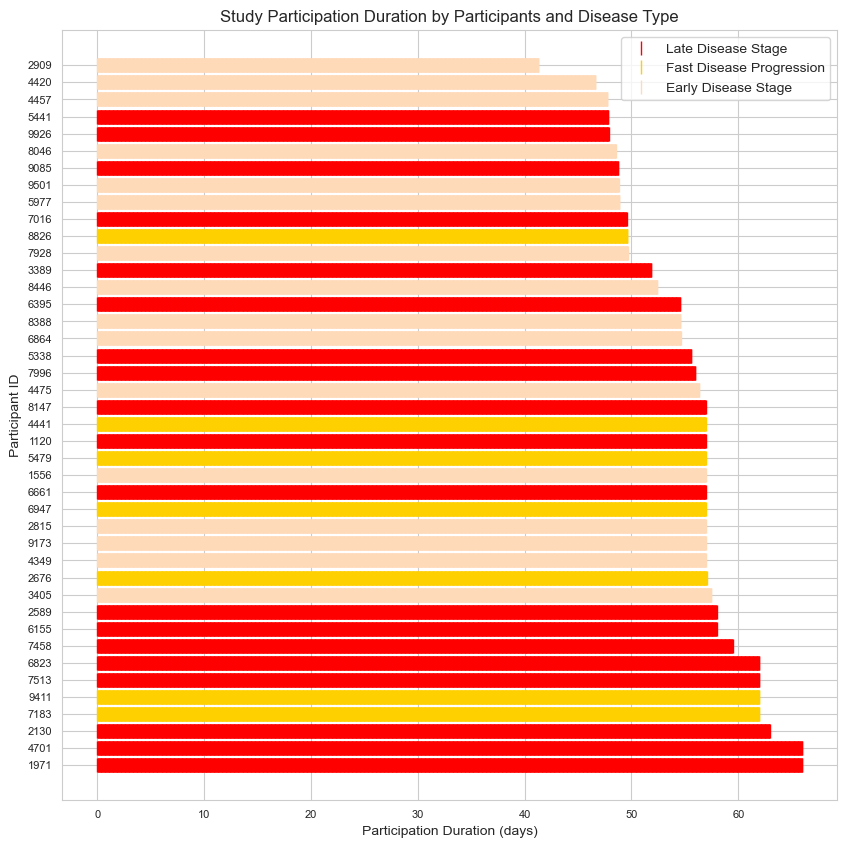

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a dictionary to store data for each participant
participant_data = {}

skip_participant = [4063, 2854]

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        participant_data[participant_id] = data

# Normalize the start times and calculate durations
for participant_id, data in participant_data.items():
    data['time'] = (data['time'] - data['time'].min()).dt.total_seconds() / 86400  # Convert to days

# Calculate the duration of data collection for each participant
participant_durations = {participant_id: data['time'].max() for participant_id, data in participant_data.items()}

# Calculate statistics
durations = list(participant_durations.values())
min_duration = min(durations)
max_duration = max(durations)
mean_duration = sum(durations) / len(durations)
std_dev_duration = (sum((x - mean_duration) ** 2 for x in durations) / len(durations)) ** 0.5

print(f"Min Duration: {min_duration} days")
print(f"Max Duration: {max_duration} days")
print(f"Mean Duration: {mean_duration} days")
print(f"Standard Deviation: {std_dev_duration} days")

# Sort participants by the duration of their data collection
sorted_participants = sorted(participant_durations.items(), key=lambda x: x[1], reverse=True)

# Define colors for each disease type
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Create a plot
plt.figure(figsize=(10, 10))

# Generate y-tick positions for each participant based on the sorted order
y_positions = {participant_id: index for index, (participant_id, _) in enumerate(sorted_participants)}

# Plot each participant's data with thicker bars
for participant_id, _ in sorted_participants:
    data = participant_data[participant_id]
    disease_type = data['disease_type'].iloc[0]
    color = colors[disease_type]
    y_position = y_positions[participant_id]
    plt.plot(data['time'], [y_position] * len(data), '|', color=color, markersize=10, label=disease_type)

# Create legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.xlabel('Participation Duration (days)')
plt.ylabel('Participant ID')
plt.title('Study Participation Duration by Participants and Disease Type')

# Set y-ticks to show each participant ID
plt.yticks(ticks=list(y_positions.values()), labels=list(y_positions.keys()), rotation=0, fontsize=8)
plt.xticks(fontsize=8)

# Show the plot
plt.show()


In [3]:
# Calculate mean and standard deviation of participation durations for each disease type
disease_durations = {}
for participant_id, data in participant_data.items():
    disease_type = data['disease_type'].iloc[0]
    duration = data['time'].max()
    if disease_type not in disease_durations:
        disease_durations[disease_type] = []
    disease_durations[disease_type].append(duration)

for disease_type, durations in disease_durations.items():
    mean_duration = pd.Series(durations).mean()
    std_dev_duration = pd.Series(durations).std()
    print(f"{disease_type}: Mean Duration = {mean_duration:.2f} days, Std Dev = {std_dev_duration:.2f} days")


Late Disease Stage: Mean Duration = 56.68 days, Std Dev = 5.67 days
Early Disease Stage: Mean Duration = 52.17 days, Std Dev = 4.89 days
Fast Disease Progression: Mean Duration = 57.35 days, Std Dev = 4.14 days


In [21]:
import pandas as pd
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a dictionary to store data for each participant
participant_data = {}

skip_participant = [4063, 2854]

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        # Filter out rows where steps, sleep, and heartrate are all 0
        data = data[~((data['steps'] == 0) & (data['sleep'] == 0) & (data['heartrate'].isna() | (data['heartrate'] == 0)))]
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data[participant_id] = data

# Normalize the start times and calculate durations
for participant_id, data in participant_data.items():
    data['days'] = (data['time'] - data['time'].min()).dt.total_seconds() / 86400  # Convert to days
    data['days'] = data['days'].astype(int)

# Combine all data into a single DataFrame
all_data = pd.concat(participant_data.values())

# Aggregate the data to daily means per disease type
daily_means = all_data.groupby(['disease_type', 'days']).agg({
    'steps': ['mean', 'std'],
    'sleep': ['mean', 'std'],
    'heartrate': ['mean', 'std'],
    'participant_id': 'nunique'
}).reset_index()

# Flatten the MultiIndex columns
daily_means.columns = ['disease_type', 'days', 'steps_mean', 'steps_std', 'sleep_mean', 'sleep_std', 'heartrate_mean', 'heartrate_std', 'N']

# Print the results
for disease_type, group_data in daily_means.groupby('disease_type'):
    print(f"\nDisease Type: {disease_type}")
    if disease_type == "Early Disease Stage":
        break
    
group_data[['days', 'steps_mean', 'steps_std', 'sleep_mean', 'sleep_std', 'heartrate_mean', 'heartrate_std', 'N']]

# Calculate overall statistics
#participant_durations = {participant_id: data['days'].max() for participant_id, data in participant_data.items()}
#durations = list(participant_durations.values())
#min_duration = min(durations)
#max_duration = max(durations)
#mean_duration = sum(durations) / len(durations)
#std_dev_duration = (sum((x - mean_duration) ** 2 for x in durations) / len(durations)) ** 0.5

#print(f"\nMin Duration: {min_duration} days")
#print(f"Max Duration: {max_duration} days")
#print(f"Mean Duration: {mean_duration} days")
#print(f"Standard Deviation: {std_dev_duration} days")



Disease Type: Early Disease Stage


,days,steps_mean,steps_std,sleep_mean,sleep_std,heartrate_mean,heartrate_std,N
0,0,355.112528,525.381192,18.039788,26.443859,82.189406,15.090430,16
1,1,428.353214,715.935476,18.903743,27.084048,82.191524,17.137229,16
2,2,402.076848,679.074587,17.480000,26.393140,82.469409,16.364248,16
3,3,387.376693,715.223831,17.965333,26.660399,80.363525,15.249741,16
4,4,348.389101,571.791163,17.324251,26.350434,80.082625,15.013237,16
5,5,414.262059,668.486085,18.099730,26.591164,81.553559,16.192089,16
6,6,432.741648,729.302475,19.474801,27.170757,81.350464,16.444604,16
7,7,438.066188,649.580124,18.569149,26.791153,81.822042,16.335254,16
8,8,432.265132,732.378184,18.489305,26.836086,80.524312,15.408737,16
9,9,422.961971,726.625630,18.378747,26.704943,80.686932,16.046840,16


In [4]:
# Calculate overall mean and standard deviation of participation durations
all_durations = list(participant_durations.values())
mean_duration = pd.Series(all_durations).mean()
std_dev_duration = pd.Series(all_durations).std()
print(f"Overall: Mean Duration = {mean_duration:.2f} days, Std Dev = {std_dev_duration:.2f} days")

Overall: Mean Duration = 55.08 days, Std Dev = 5.54 days


In [11]:
# Data Cleaning:
# Too short: 4063
# Too long: 2854

skip_participant = [4063, 2854]

# Zooming In

## Taking a look at an individual participant

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Group by disease type and days_from_start, then calculate mean trends
daily_data = all_data.groupby(['disease_type', 'days_from_start']).mean().reset_index()

# Define colors for each disease type using a refined color palette
#colors = {
#    'Late Disease Stage': '#FF6F61',  # Coral
#    'Early Disease Stage': '#6B5B95',  # Royal purple
#    'Fast Disease Progression': '#88B04B'  # Olive green
#}

## Plot mean trends for steps, sleep, and heartrate
#fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

#for disease_type, color in colors.items():
#    disease_data = daily_data[daily_data['disease_type'] == disease_type]
#    axes[0].plot(disease_data['days_from_start'], disease_data['steps'], label=disease_type, color=color)
#    axes[1].plot(disease_data['days_from_start'], disease_data['sleep'], label=disease_type, color=color)
#    axes[2].plot(disease_data['days_from_start'], disease_data['heartrate'], label=disease_type, color=color)

## Set titles and labels
#axes[0].set_title('Mean Steps Over Time (Days from Start)')
#axes[1].set_title('Mean Sleep Over Time (Days from Start)')
#axes[2].set_title('Mean Heartrate Over Time (Days from Start)')
#axes[2].set_xlabel('Days from Start')

## Add y-labels
#axes[0].set_ylabel('Steps')
#axes[1].set_ylabel('Sleep')
#axes[2].set_ylabel('Heartrate')

## Add legend
#for ax in axes:
#    ax.legend(title='Disease Type')

## Improve layout
#plt.tight_layout()
#plt.show()


/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_94362/2368956920.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = all_data.groupby(['disease_type', 'days_from_start']).mean().reset_index()


In [13]:
daily_data[daily_data["disease_type"] == "Fast Disease Progression"]

,disease_type,days_from_start,steps,sleep,heartrate,participant_id
97,Fast Disease Progression,0,128.558063,4.191781,80.970136,6987.945205
98,Fast Disease Progression,1,248.383791,18.964286,79.016567,6423.285714
99,Fast Disease Progression,2,334.078782,20.952381,78.018255,6423.285714
100,Fast Disease Progression,3,310.680129,18.470238,79.206987,6423.285714
101,Fast Disease Progression,4,357.059683,19.916667,80.910926,6423.285714
...,...,...,...,...,...,...
154,Fast Disease Progression,57,206.409579,3.805556,75.183013,6423.333333
155,Fast Disease Progression,58,0.000000,0.000000,NaN,8297.000000
156,Fast Disease Progression,59,0.000000,0.000000,NaN,8297.000000
157,Fast Disease Progression,60,91.325637,0.000000,74.943376,8297.000000


In [14]:
all_data[all_data["disease_type"] == "Fast Disease Progression"]

,time,steps,sleep,heartrate,disease_type,participant_id,date,days_from_start
0,2021-02-18 00:00:00,0.000000,0,NaN,Fast Disease Progression,6947,2021-02-18,0
1,2021-02-18 01:00:00,0.000000,0,NaN,Fast Disease Progression,6947,2021-02-18,0
2,2021-02-18 02:00:00,0.000000,0,NaN,Fast Disease Progression,6947,2021-02-18,0
3,2021-02-18 03:00:00,0.000000,0,NaN,Fast Disease Progression,6947,2021-02-18,0
4,2021-02-18 04:00:00,0.000000,0,NaN,Fast Disease Progression,6947,2021-02-18,0
...,...,...,...,...,...,...,...,...
1365,2021-10-05 19:00:00,23.143957,0,66.940184,Fast Disease Progression,2676,2021-10-05,57
1366,2021-10-05 20:00:00,71.704056,0,65.803670,Fast Disease Progression,2676,2021-10-05,57
1367,2021-10-05 21:00:00,94.033096,0,68.667236,Fast Disease Progression,2676,2021-10-05,57
1368,2021-10-05 22:00:00,0.000000,0,60.500492,Fast Disease Progression,2676,2021-10-05,57


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Group by disease type and days_from_start, then calculate mean trends
grouped = all_data.groupby(['disease_type', 'days_from_start'])

# Calculate mean, std, and count
daily_data = grouped.agg({
    'steps': ['mean', 'std', 'count'],
    'sleep': ['mean', 'std', 'count'],
    'heartrate': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
daily_data.columns = ['disease_type', 'days_from_start', 'steps_mean', 'steps_std', 'steps_count', 'sleep_mean', 'sleep_std', 'sleep_count', 'heartrate_mean', 'heartrate_std', 'heartrate_count']

# Define colors for each disease type using a refined color palette
colors = {
    'Late Disease Stage': '#FF6F61',  # Coral
    'Early Disease Stage': '#6B5B95',  # Royal purple
    'Fast Disease Progression': '#88B04B'  # Olive green
}

## Plot mean trends for steps, sleep, and heartrate
#fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)
#
#for disease_type, color in colors.items():
#    disease_data = daily_data[daily_data['disease_type'] == disease_type]
#    axes[0].errorbar(disease_data['days_from_start'], disease_data['steps_mean'], yerr=disease_data['steps_std'], label=disease_type, color=color)
#    axes[1].errorbar(disease_data['days_from_start'], disease_data['sleep_mean'], yerr=disease_data['sleep_std'], label=disease_type, color=color)
#    axes[2].errorbar(disease_data['days_from_start'], disease_data['heartrate_mean'], yerr=disease_data['heartrate_std'], label=disease_type, color=color)
#
## Set titles and labels
#axes[0].set_title('Mean Steps Over Time (Days from Start)')
#axes[1].set_title('Mean Sleep Over Time (Days from Start)')
#axes[2].set_title('Mean Heartrate Over Time (Days from Start)')
#axes[2].set_xlabel('Days from Start')
#
## Add y-labels
#axes[0].set_ylabel('Steps')
#axes[1].set_ylabel('Sleep')
#axes[2].set_ylabel('Heartrate')
#
## Add legend
#for ax in axes:
#    ax.legend(title='Disease Type')
#
## Improve layout
#plt.tight_layout()
#plt.show()
#

In [30]:
#filtered_data = all_data[(all_data["participant_id"] == 1971) & (all_data["days_from_start"] != 0)]
filtered_data = all_data[(all_data["participant_id"] == 1120) & (all_data["days_from_start"] != 0)]
filtered_data

,time,steps,sleep,heartrate,disease_type,participant_id,date,days_from_start
24,2021-06-09 00:00:00,0.000000,0,72.097265,Late Disease Stage,1120,2021-06-09,1
25,2021-06-09 01:00:00,0.000000,0,76.176299,Late Disease Stage,1120,2021-06-09,1
26,2021-06-09 02:00:00,0.000000,0,78.143429,Late Disease Stage,1120,2021-06-09,1
27,2021-06-09 03:00:00,0.000000,45,76.017211,Late Disease Stage,1120,2021-06-09,1
28,2021-06-09 04:00:00,0.000000,60,73.999163,Late Disease Stage,1120,2021-06-09,1
...,...,...,...,...,...,...,...,...
1363,2021-08-03 19:00:00,132.347200,0,101.434388,Late Disease Stage,1120,2021-08-03,56
1364,2021-08-03 20:00:00,95.437798,0,94.344416,Late Disease Stage,1120,2021-08-03,56
1365,2021-08-03 21:00:00,149.125840,0,87.033982,Late Disease Stage,1120,2021-08-03,56
1366,2021-08-03 22:00:00,121.240100,0,83.206342,Late Disease Stage,1120,2021-08-03,56


/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_42537/3272249751.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['time'].dt.date


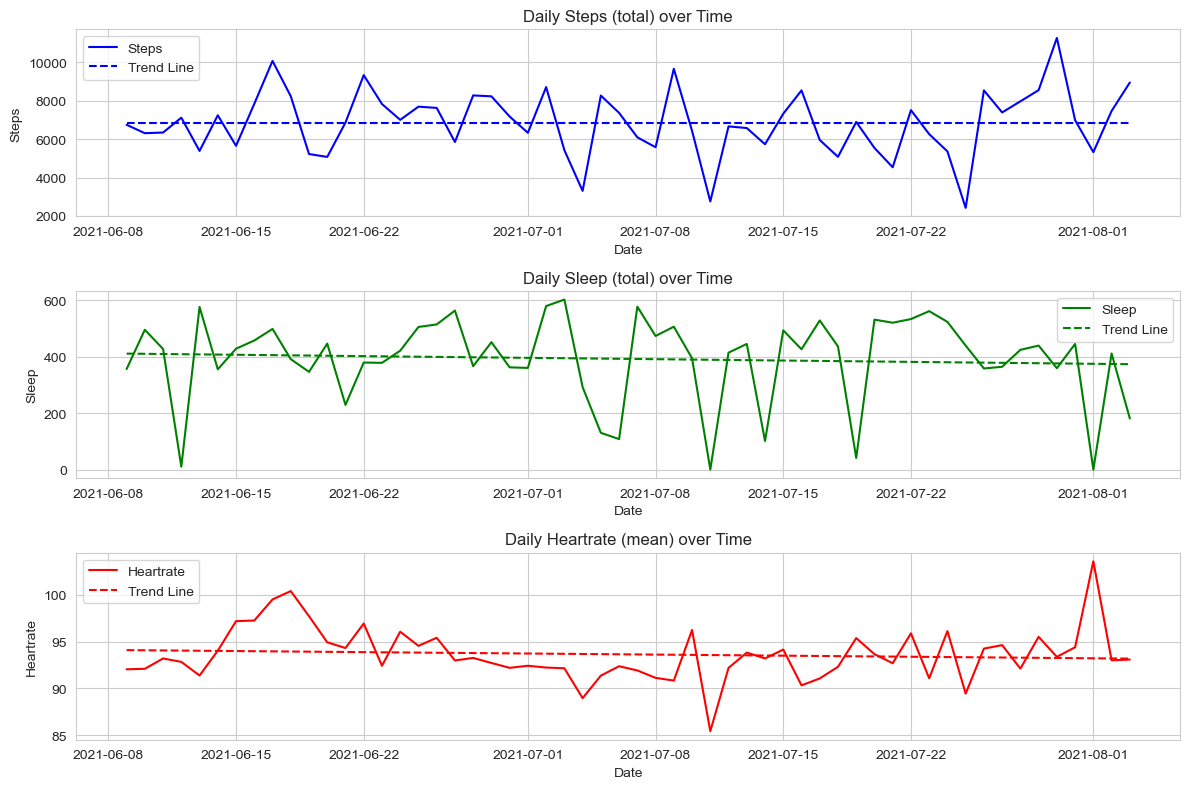

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Aggregate daily data
filtered_data['date'] = filtered_data['time'].dt.date
daily_data = filtered_data.groupby('date').agg({
    'steps': 'sum',
    'sleep': 'sum',
    'heartrate': 'mean'
}).reset_index()

# Convert dates to numeric format
daily_data['date_num'] = mdates.date2num(daily_data['date'])

# Plotting the trends with trend lines
plt.figure(figsize=(12, 8))

# Steps over time
plt.subplot(3, 1, 1)
plt.plot(daily_data['date'], daily_data['steps'], label='Steps', color='b')
# Adding trend line
steps_trend = np.polyfit(daily_data['date_num'], daily_data['steps'], 1)
plt.plot(daily_data['date'], np.polyval(steps_trend, daily_data['date_num']), color='b', linestyle='--', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.title('Daily Steps (total) over Time')
plt.legend()

# Sleep over time
plt.subplot(3, 1, 2)
plt.plot(daily_data['date'], daily_data['sleep'], label='Sleep', color='g')
# Adding trend line
sleep_trend = np.polyfit(daily_data['date_num'], daily_data['sleep'], 1)
plt.plot(daily_data['date'], np.polyval(sleep_trend, daily_data['date_num']), color='g', linestyle='--', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('Sleep')
plt.title('Daily Sleep (total) over Time')
plt.legend()

# Heartrate over time
plt.subplot(3, 1, 3)
plt.plot(daily_data['date'], daily_data['heartrate'], label='Heartrate', color='r')
# Adding trend line
heartrate_trend = np.polyfit(daily_data['date_num'], daily_data['heartrate'], 1)
plt.plot(daily_data['date'], np.polyval(heartrate_trend, daily_data['date_num']), color='r', linestyle='--', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('Heartrate')
plt.title('Daily Heartrate (mean) over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
daily_data

,date,steps,sleep,heartrate,date_num
0,2021-06-09,6749.318241,356,92.041697,18787.0
1,2021-06-10,6311.257864,495,92.094506,18788.0
2,2021-06-11,6345.329775,427,93.197412,18789.0
3,2021-06-12,7119.506445,10,92.834636,18790.0
4,2021-06-13,5387.162254,576,91.376630,18791.0
5,2021-06-14,7244.770781,355,94.030321,18792.0
6,2021-06-15,5651.450747,428,97.191790,18793.0
7,2021-06-16,7840.395308,457,97.254697,18794.0
8,2021-06-17,10076.085248,498,99.512739,18795.0
9,2021-06-18,8237.597713,391,100.404847,18796.0


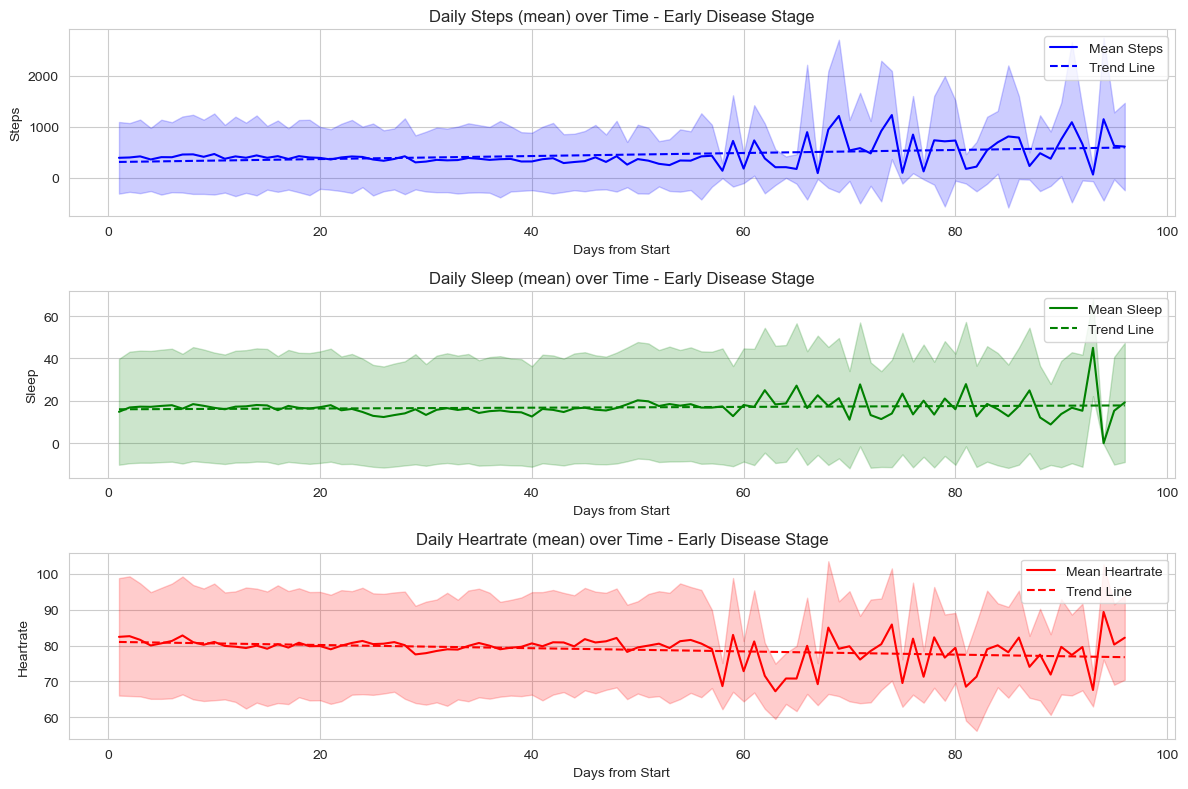

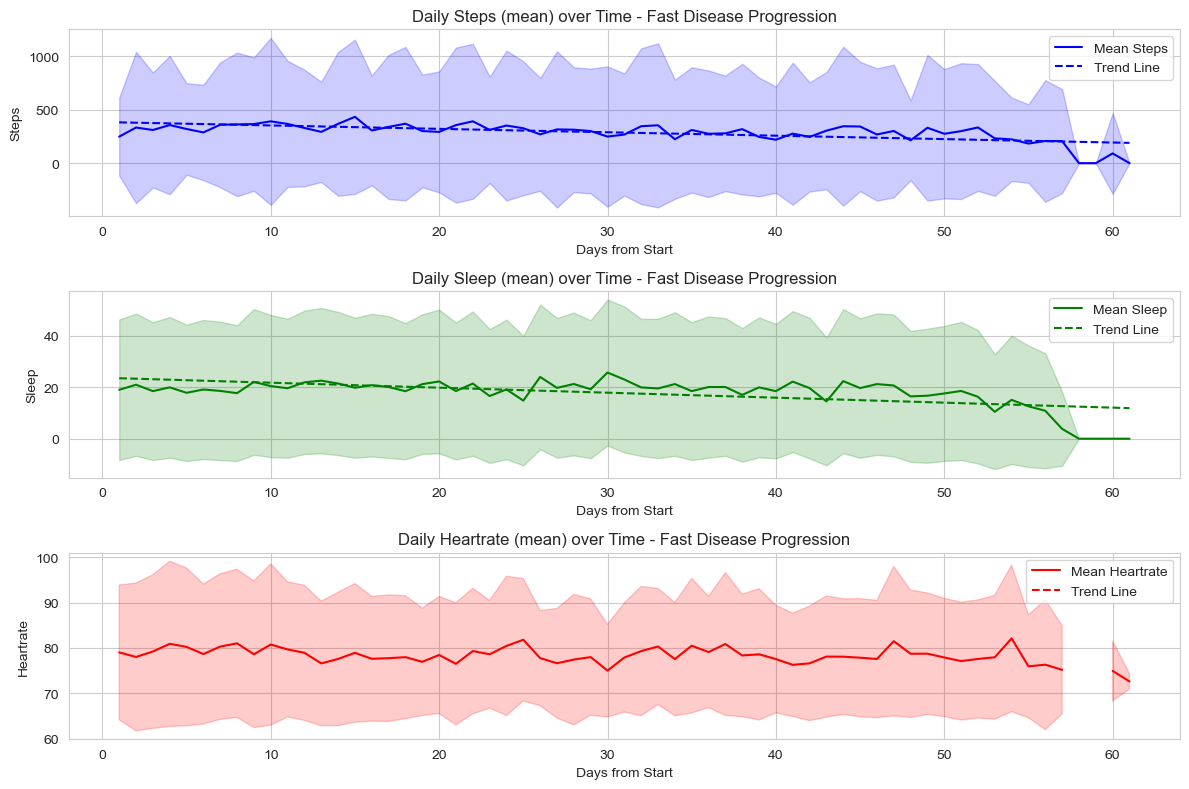

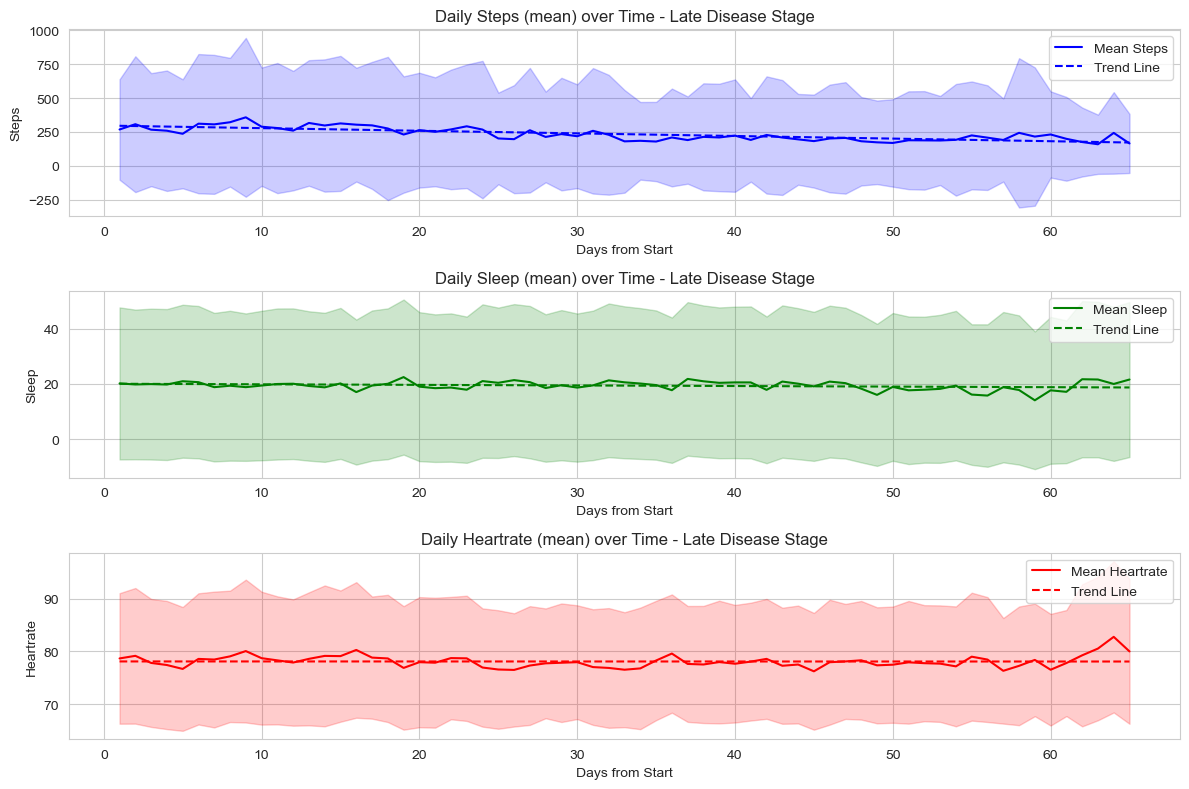

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'all_data' is your DataFrame
all_data['time'] = pd.to_datetime(all_data['time'])

# Filter out records where 'days_from_start' is 0
all_data = all_data[all_data["days_from_start"] != 0]

# Function to plot data for a specific disease type
def plot_disease_type_data(disease_type, data):
    plt.figure(figsize=(12, 8))

    # Aggregate daily data by disease type
    daily_data = data.groupby('days_from_start').agg({
        'steps': ['mean', 'std'],
        'sleep': ['mean', 'std'],
        'heartrate': ['mean', 'std']
    }).reset_index()

    daily_data.columns = ['days_from_start', 'steps_mean', 'steps_std', 'sleep_mean', 'sleep_std', 'heartrate_mean', 'heartrate_std']

    # Plot steps
    plt.subplot(3, 1, 1)
    plt.plot(daily_data['days_from_start'], daily_data['steps_mean'], label='Mean Steps', color='b')
    plt.fill_between(daily_data['days_from_start'], daily_data['steps_mean'] - daily_data['steps_std'], 
                     daily_data['steps_mean'] + daily_data['steps_std'], color='b', alpha=0.2)
    steps_trend = np.polyfit(daily_data['days_from_start'], daily_data['steps_mean'], 1)
    plt.plot(daily_data['days_from_start'], np.polyval(steps_trend, daily_data['days_from_start']), color='b', linestyle='--', label='Trend Line')
    plt.xlabel('Days from Start')
    plt.ylabel('Steps')
    plt.title(f'Daily Steps (mean) over Time - {disease_type}')
    plt.legend()

    # Plot sleep
    plt.subplot(3, 1, 2)
    plt.plot(daily_data['days_from_start'], daily_data['sleep_mean'], label='Mean Sleep', color='g')
    plt.fill_between(daily_data['days_from_start'], daily_data['sleep_mean'] - daily_data['sleep_std'], 
                     daily_data['sleep_mean'] + daily_data['sleep_std'], color='g', alpha=0.2)
    sleep_trend = np.polyfit(daily_data['days_from_start'], daily_data['sleep_mean'], 1)
    plt.plot(daily_data['days_from_start'], np.polyval(sleep_trend, daily_data['days_from_start']), color='g', linestyle='--', label='Trend Line')
    plt.xlabel('Days from Start')
    plt.ylabel('Sleep')
    plt.title(f'Daily Sleep (mean) over Time - {disease_type}')
    plt.legend()

    # Plot heartrate
    plt.subplot(3, 1, 3)
    plt.plot(daily_data['days_from_start'], daily_data['heartrate_mean'], label='Mean Heartrate', color='r')
    plt.fill_between(daily_data['days_from_start'], daily_data['heartrate_mean'] - daily_data['heartrate_std'], 
                     daily_data['heartrate_mean'] + daily_data['heartrate_std'], color='r', alpha=0.2)
    heartrate_trend = np.polyfit(daily_data['days_from_start'], daily_data['heartrate_mean'], 1)
    plt.plot(daily_data['days_from_start'], np.polyval(heartrate_trend, daily_data['days_from_start']), color='r', linestyle='--', label='Trend Line')
    plt.xlabel('Days from Start')
    plt.ylabel('Heartrate')
    plt.title(f'Daily Heartrate (mean) over Time - {disease_type}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Group by disease_type and plot for each group
for disease_type, group_data in all_data.groupby('disease_type'):
    plot_disease_type_data(disease_type, group_data)


In [25]:
daily_data

,disease_type,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
0,Early Disease Stage,0,197.091334,437.786872,432,3.594907,13.453030,432,84.962176,13.223196,213
1,Early Disease Stage,1,394.284353,700.722722,425,14.877647,24.926762,425,82.418880,16.337777,380
2,Early Disease Stage,2,400.712693,672.696134,408,16.916667,26.265193,408,82.607701,16.640948,384
3,Early Disease Stage,3,422.300466,720.089385,408,17.299020,26.397431,408,81.587002,15.728066,394
4,Early Disease Stage,4,361.571058,617.730618,408,17.223039,26.332625,408,80.012374,14.840732,395
...,...,...,...,...,...,...,...,...,...,...,...
220,Late Disease Stage,61,198.999969,309.285529,120,17.150000,25.836151,120,77.783948,10.047957,118
221,Late Disease Stage,62,175.309778,254.532696,72,21.708333,28.270543,72,79.250085,13.459053,72
222,Late Disease Stage,63,158.820277,218.807354,48,21.604167,28.163459,48,80.529556,13.584823,48
223,Late Disease Stage,64,242.665734,301.067083,48,20.000000,27.854485,48,82.751501,14.329344,48


In [55]:
# calculate daily means of participants before merging everyhting together
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    
    # skip participants if flagged
    if participant_id in skip_participant:
        print(f"Skipping participant {participant_id}")
        continue
        
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        
        # Calculate daily means
        data.set_index('time', inplace=True)
        daily_data = data.resample('D').mean().reset_index()
        
        daily_data['disease_type'] = disease_type
        daily_data['participant_id'] = participant_id
        participant_data.append(daily_data)
        
print(f"Considering {len(participant_data)} participants")

Skipping participant 2854
Skipping participant 4063
Considering 42 participants


In [56]:

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Group by disease type and days_from_start, then calculate mean trends
grouped = all_data.groupby(['disease_type', 'days_from_start'])

# Calculate mean, std, and count
daily_summary = grouped.agg({
    'steps': ['mean', 'std', 'count'],
    'sleep': ['mean', 'std', 'count'],
    'heartrate': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
daily_summary.columns = ['disease_type', 'days_from_start', 'steps_mean', 'steps_std', 'steps_count', 'sleep_mean', 'sleep_std', 'sleep_count', 'heartrate_mean', 'heartrate_std', 'heartrate_count']

# Define colors for each disease type using a refined color palette
#colors = {
#    'Late Disease Stage': '#FF6F61',  # Coral
#    'Early Disease Stage': '#6B5B95',  # Royal purple
#    'Fast Disease Progression': '#88B04B'  # Olive green
#}
#
## Plot mean trends for steps, sleep, and heartrate
#fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)
#
#for disease_type, color in colors.items():
#    disease_data = daily_summary[daily_summary['disease_type'] == disease_type]
#    axes[0].errorbar(disease_data['days_from_start'], disease_data['steps_mean'], yerr=disease_data['steps_std'], label=disease_type, color=color)
#    axes[1].errorbar(disease_data['days_from_start'], disease_data['sleep_mean'], yerr=disease_data['sleep_std'], label=disease_type, color=color)
#    axes[2].errorbar(disease_data['days_from_start'], disease_data['heartrate_mean'], yerr=disease_data['heartrate_std'], label=disease_type, color=color)
#
## Set titles and labels
#axes[0].set_title('Mean Steps Over Time (Days from Start)')
#axes[1].set_title('Mean Sleep Over Time (Days from Start)')
#axes[2].set_title('Mean Heartrate Over Time (Days from Start)')
#axes[2].set_xlabel('Days from Start')
#
## Add y-labels
#axes[0].set_ylabel('Steps')
#axes[1].set_ylabel('Sleep')
#axes[2].set_ylabel('Heartrate')
#
## Add legend
#for ax in axes:
#    ax.legend(title='Disease Type')
#
## Improve layout
#plt.tight_layout()
#plt.show()


In [27]:
daily_summary[daily_summary["disease_type"] == "Fast Disease Progression"]

,disease_type,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
97,Fast Disease Progression,0,111.723078,85.282072,7,11.500000,21.590960,7,82.455976,11.572229,5
98,Fast Disease Progression,1,248.383791,135.694404,7,18.964286,6.488658,7,79.185183,10.630699,7
99,Fast Disease Progression,2,334.078782,131.634575,7,20.952381,5.417277,7,78.538190,10.537196,7
100,Fast Disease Progression,3,310.680129,144.421581,7,18.470238,4.466679,7,79.206987,12.969486,7
101,Fast Disease Progression,4,357.059683,155.769906,7,19.916667,4.164374,7,80.910926,14.429385,7
...,...,...,...,...,...,...,...,...,...,...,...
154,Fast Disease Progression,57,206.409579,357.031543,3,3.805556,6.591416,3,74.305548,2.253938,3
155,Fast Disease Progression,58,0.000000,0.000000,2,0.000000,0.000000,2,NaN,NaN,0
156,Fast Disease Progression,59,0.000000,0.000000,2,0.000000,0.000000,2,NaN,NaN,0
157,Fast Disease Progression,60,91.325637,129.153954,2,0.000000,0.000000,2,74.313017,2.419684,2


In [57]:
daily_summary[daily_summary["disease_type"] == "Early Disease Stage"]

,disease_type,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
0,Early Disease Stage,0,204.253057,136.674830,16,3.500000,2.890157,16,86.276635,8.547393,14
1,Early Disease Stage,1,354.759981,194.810887,16,14.333333,7.975861,16,83.058417,11.872981,15
2,Early Disease Stage,2,381.148887,170.416986,16,16.687500,5.874044,16,82.540406,11.542279,16
3,Early Disease Stage,3,408.439819,192.311431,16,17.434896,7.231249,16,81.964175,10.625711,16
4,Early Disease Stage,4,354.684048,178.955551,16,17.848958,7.228350,16,80.210066,10.074488,16
5,Early Disease Stage,5,374.387419,163.719976,16,17.841146,6.901644,16,81.087353,10.385918,16
6,Early Disease Stage,6,384.926702,182.365064,16,18.257812,7.187538,16,81.584035,11.124875,16
7,Early Disease Stage,7,436.030974,150.127761,16,17.231771,6.823366,16,82.837830,10.647883,16
8,Early Disease Stage,8,439.361175,182.013091,16,18.429688,6.329617,16,81.367638,10.837909,16
9,Early Disease Stage,9,393.942926,161.439246,16,17.825521,7.316177,16,80.843076,10.246878,16


In [29]:
daily_summary[daily_summary["disease_type"] == "Late Disease Stage"]

,disease_type,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
159,Late Disease Stage,0,146.274396,80.215947,19,3.697368,2.275102,19,80.642727,6.684699,19
160,Late Disease Stage,1,267.921184,107.355479,19,20.190789,4.288369,19,78.659100,7.059635,19
161,Late Disease Stage,2,307.009069,126.339479,19,19.813596,4.433958,19,79.136696,6.399299,19
162,Late Disease Stage,3,266.649855,112.896081,19,19.947368,7.013062,19,77.901607,6.220369,19
163,Late Disease Stage,4,258.865642,146.363518,19,19.785088,6.246963,19,77.421709,5.242089,19
...,...,...,...,...,...,...,...,...,...,...,...
220,Late Disease Stage,61,198.999969,114.737027,5,17.150000,5.417035,5,77.762883,6.624761,5
221,Late Disease Stage,62,175.309778,154.351994,3,21.708333,4.486864,3,79.250085,12.003972,3
222,Late Disease Stage,63,158.820277,78.880416,2,21.604167,2.150783,2,80.529556,13.893017,2
223,Late Disease Stage,64,242.665734,164.758853,2,20.000000,3.476608,2,82.751501,16.669289,2


In [30]:
daily_summary[daily_summary["disease_type"] == "Early Disease Stage"].describe()

,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
count,97.000000,97.000000,58.000000,97.000000,97.000000,58.000000,97.000000,97.000000,58.000000,97.000000
mean,48.000000,449.774501,226.254643,9.680412,16.875569,7.804678,9.680412,79.060042,10.096791,9.525773
std,28.145456,237.909525,41.685368,7.598720,4.893275,1.957481,7.598720,4.067263,1.195436,7.456950
min,0.000000,65.983383,130.399223,1.000000,0.083333,0.942809,1.000000,67.271455,4.990880,1.000000
25%,24.000000,336.153910,199.208028,1.000000,14.850490,7.115667,1.000000,78.706756,9.564937,1.000000
50%,48.000000,390.931782,219.834619,14.000000,16.737745,7.987984,14.000000,80.042379,10.099379,14.000000
75%,72.000000,480.920176,248.150991,17.000000,17.997549,8.995951,17.000000,81.148475,10.655511,17.000000
max,96.000000,1231.044312,402.801946,18.000000,45.000000,11.626810,18.000000,89.353455,12.421799,17.000000


In [31]:
daily_summary[daily_summary["disease_type"] == "Fast Disease Progression"].describe()

,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,60.000000,59.000000,62.000000
mean,30.500000,283.192701,176.793060,6.500000,17.554820,6.725311,6.500000,78.428184,9.584260,6.241935
std,18.041619,90.143673,66.094524,1.327515,5.832745,3.961058,1.327515,1.960138,2.426061,1.636525
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,72.634230,2.253938,0.000000
25%,15.250000,248.596915,137.525061,7.000000,16.672619,3.656252,7.000000,77.564519,8.554426,6.000000
50%,30.500000,303.019252,178.656654,7.000000,19.348214,6.528427,7.000000,78.361909,9.816687,7.000000
75%,45.750000,342.501883,215.376854,7.000000,20.909226,9.214793,7.000000,79.407886,11.133731,7.000000
max,61.000000,434.129867,357.031543,7.000000,25.684524,21.590960,7.000000,82.788329,15.453590,7.000000


In [32]:
daily_summary[daily_summary["disease_type"] == "Late Disease Stage"].describe()

,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,32.500000,231.787305,144.012657,16.363636,19.151090,5.406830,16.363636,78.070992,7.042286,16.227273
std,19.196354,48.647479,32.359399,5.166866,2.533159,1.746864,5.166866,1.211084,2.135416,5.205900
min,0.000000,146.274396,52.714727,2.000000,3.697368,1.207974,2.000000,75.970913,5.063809,2.000000
25%,16.250000,190.497693,123.967132,16.250000,18.487390,4.305951,16.250000,77.425496,6.074585,15.250000
50%,32.500000,222.130927,147.053960,19.000000,19.570175,5.356767,19.000000,77.922592,6.461072,19.000000
75%,48.750000,267.158773,164.330431,19.000000,20.516996,6.403501,19.000000,78.709683,7.113847,19.000000
max,65.000000,357.800974,207.654705,19.000000,22.482456,9.732228,19.000000,82.751501,16.669289,19.000000


In [51]:
daily_summary

,disease_type,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
0,Early Disease Stage,0,197.091334,130.399223,18,3.594907,2.789555,18,84.864629,8.909673,16
1,Early Disease Stage,1,399.518828,225.048300,18,14.950163,7.706262,18,82.539235,11.222583,17
2,Early Disease Stage,2,400.712693,183.666680,17,16.916667,5.765472,17,82.561425,11.176100,17
3,Early Disease Stage,3,422.300466,194.777320,17,17.299020,7.024005,17,81.859103,10.297418,17
4,Early Disease Stage,4,361.571058,175.584301,17,17.223039,7.459467,17,80.229993,9.754927,17
...,...,...,...,...,...,...,...,...,...,...,...
220,Late Disease Stage,61,198.999969,114.737027,5,17.150000,5.417035,5,77.762883,6.624761,5
221,Late Disease Stage,62,175.309778,154.351994,3,21.708333,4.486864,3,79.250085,12.003972,3
222,Late Disease Stage,63,158.820277,78.880416,2,21.604167,2.150783,2,80.529556,13.893017,2
223,Late Disease Stage,64,242.665734,164.758853,2,20.000000,3.476608,2,82.751501,16.669289,2


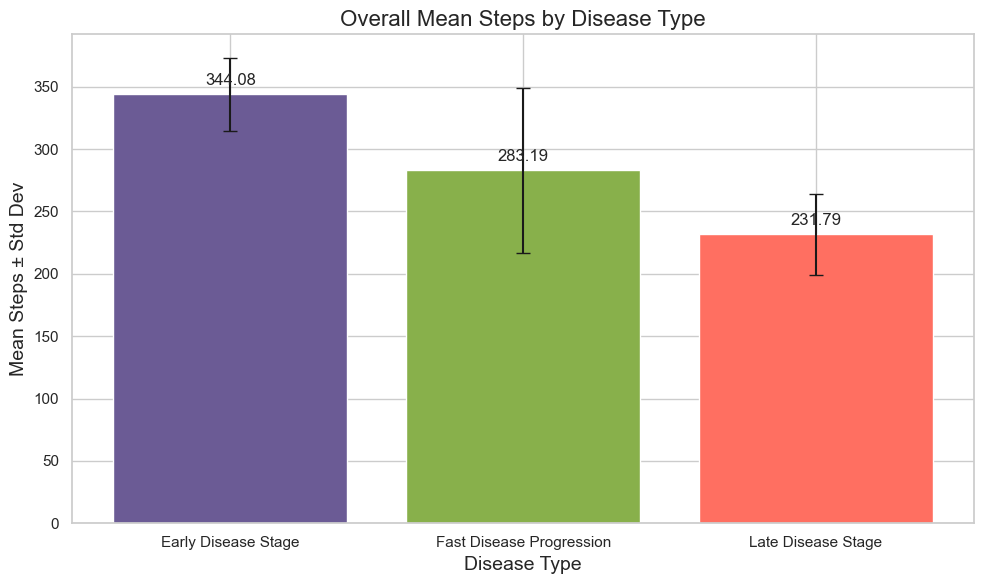

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_summary' is already loaded as a DataFrame
# Example:
# daily_summary = pd.read_csv('path_to_daily_summary.csv')

# Define colors for each disease type using a refined color palette
colors = {
    'Late Disease Stage': '#FF6F61',  # Coral
    'Early Disease Stage': '#6B5B95',  # Royal purple
    'Fast Disease Progression': '#88B04B'  # Olive green
}

# Aggregate the data to get the overall mean and standard deviation for each disease type
agg_data = daily_summary.groupby('disease_type').agg({
    'steps_mean': 'mean',
    'steps_std': lambda x: x.std()  # Calculate std dev of daily means
}).reset_index()

# Plot mean steps with standard deviation as bar charts
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(agg_data['disease_type'], agg_data['steps_mean'], yerr=agg_data['steps_std'], capsize=5, color=[colors[d] for d in agg_data['disease_type']])

# Set titles and labels
ax.set_title('Overall Mean Steps by Disease Type', fontsize=16)
ax.set_xlabel('Disease Type', fontsize=14)
ax.set_ylabel('Mean Steps ± Std Dev', fontsize=14)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


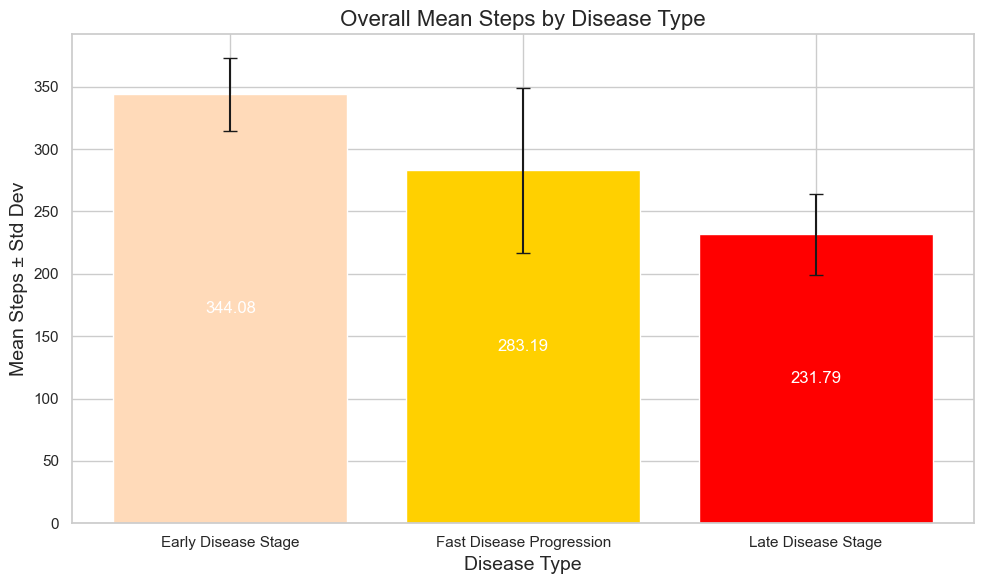

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_summary' is already loaded as a DataFrame
# Example:
# daily_summary = pd.read_csv('path_to_daily_summary.csv')

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Aggregate the data to get the overall mean and standard deviation for each disease type
agg_data = daily_summary.groupby('disease_type').agg({
    'steps_mean': 'mean',
    'steps_std': lambda x: x.std()  # Calculate std dev of daily means
}).reset_index()

# Plot mean steps with standard deviation as bar charts
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(agg_data['disease_type'], agg_data['steps_mean'], yerr=agg_data['steps_std'], capsize=5, color=[colors[d] for d in agg_data['disease_type']])

# Set titles and labels
ax.set_title('Overall Mean Steps by Disease Type', fontsize=16)
ax.set_xlabel('Disease Type', fontsize=14)
ax.set_ylabel('Mean Steps ± Std Dev', fontsize=14)

# Add text labels in the center of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, round(yval, 2), ha='center', va='center', fontsize=12, color='white')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


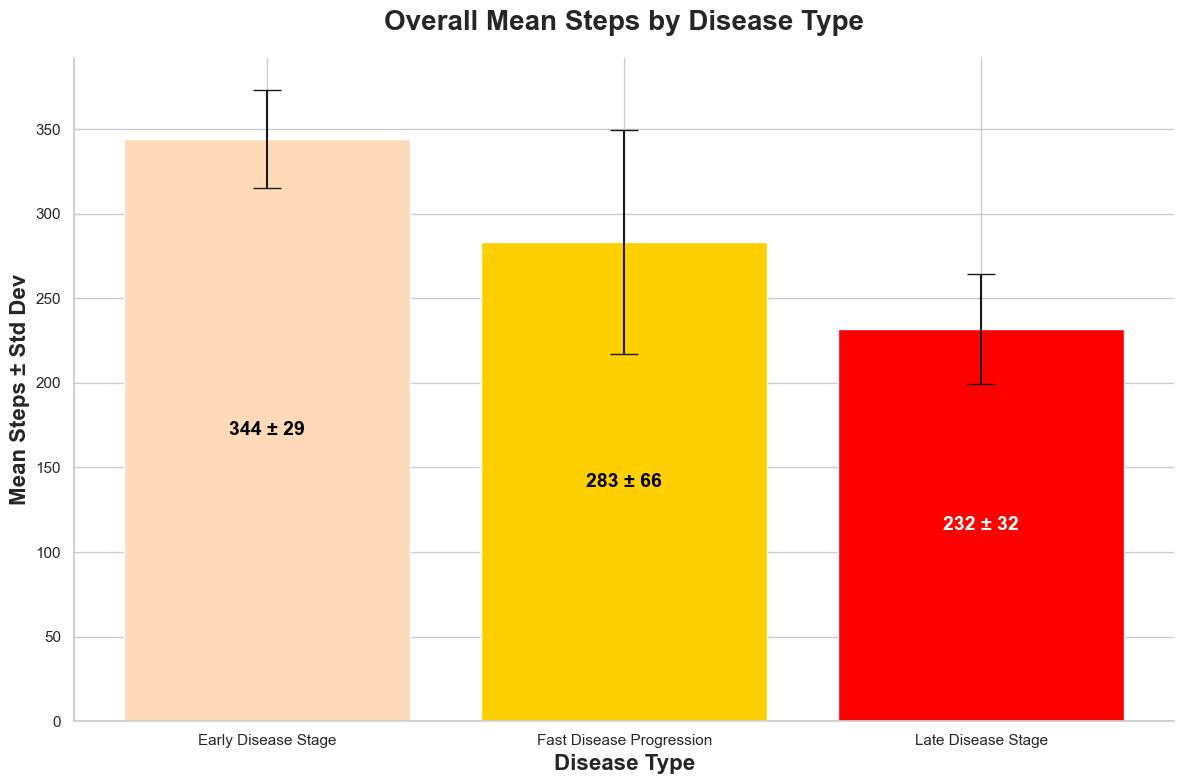

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'daily_summary' is already loaded as a DataFrame
# Example:
# daily_summary = pd.read_csv('path_to_daily_summary.csv')

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Aggregate the data to get the overall mean and standard deviation for each disease type
agg_data = daily_summary.groupby('disease_type').agg({
    'steps_mean': 'mean',
    'steps_std': lambda x: x.std()  # Calculate std dev of daily means
}).reset_index()

# Use seaborn's set_theme to give the plot a modern look
sns.set_theme(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(agg_data['disease_type'], agg_data['steps_mean'], yerr=agg_data['steps_std'], capsize=10, color=[colors[d] for d in agg_data['disease_type']])

# Set titles and labels
ax.set_title('Overall Mean Steps by Disease Type', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Disease Type', fontsize=16, weight='bold')
ax.set_ylabel('Mean Steps ± Std Dev', fontsize=16, weight='bold')

# Add text labels in the center of the bars
i = 0
for bar, mean, std in zip(bars, agg_data['steps_mean'], agg_data['steps_std']):
    label = f'{int(round(mean, 0))} ± {int(round(std, 0))}'
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, label, ha='center', va='center', fontsize=14, color=["black","black","white"][i], weight='bold')
    i += 1

# Add a custom legend
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
#labels = colors.keys()
#ax.legend(handles, labels, title="Disease Type", loc='upper right', fontsize=12, title_fontsize='13', frameon=True, fancybox=True, shadow=True, borderpad=1)

# Remove top and right spines for a cleaner look
sns.despine()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
daily_summary.describe()

,days_from_start,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,heartrate_count
count,225.000000,225.000000,186.000000,225.000000,225.000000,186.000000,225.000000,223.000000,183.000000,225.000000
mean,38.631111,339.929050,180.584808,10.764444,17.730226,6.594040,10.764444,78.597312,8.829924,10.586667
std,24.545001,191.621672,58.988261,6.910304,4.723146,2.897294,6.910304,2.964417,2.409692,6.892853
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,67.271455,2.253938,0.000000
25%,18.000000,223.192086,142.535643,6.000000,16.130128,4.624032,6.000000,77.563135,6.657869,6.000000
50%,37.000000,310.680129,178.089632,8.000000,18.434524,6.630693,8.000000,78.726544,8.954716,8.000000
75%,56.000000,375.501881,217.123541,17.000000,20.065476,8.344668,17.000000,80.286753,10.501541,17.000000
max,96.000000,1231.044312,402.801946,19.000000,45.000000,21.590960,19.000000,89.353455,16.669289,19.000000


In [65]:
print(daily_summary)

            disease_type  days_from_start  steps_mean   steps_std  \
0    Early Disease Stage                0  204.253057  136.674830   
1    Early Disease Stage                1  354.759981  194.810887   
2    Early Disease Stage                2  381.148887  170.416986   
3    Early Disease Stage                3  408.439819  192.311431   
4    Early Disease Stage                4  354.684048  178.955551   
..                   ...              ...         ...         ...   
181   Late Disease Stage               61  198.999969  114.737027   
182   Late Disease Stage               62  175.309778  154.351994   
183   Late Disease Stage               63  158.820277   78.880416   
184   Late Disease Stage               64  242.665734  164.758853   
185   Late Disease Stage               65  164.901818   52.714727   

     steps_count  sleep_mean  sleep_std  sleep_count  heartrate_mean  \
0             16    3.500000   2.890157           16       86.276635   
1             16   14.33333

In [66]:
# ANOVA significance
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


model = ols('steps_mean ~ C(disease_type)', data=daily_summary).fit()
anova_results = anova_lm(model)

print("ANOVA Results")
print(anova_results)

# Check if ANOVA is significant
if anova_results['PR(>F)'][0] < 0.05:
    print("There is a significant difference between the groups. Performing post hoc tests.")
    
    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=daily_summary['steps_mean'], groups=daily_summary['disease_type'], alpha=0.05)
    print(tukey_result)
else:
    print("No significant difference found between the groups.")

# Save the ANOVA results to a CSV file if needed
anova_results.to_csv('anova_results.csv')

ANOVA Results
                    df         sum_sq        mean_sq         F        PR(>F)
C(disease_type)    2.0  389331.785838  194665.892919  40.59546  2.563232e-15
Residual         183.0  877533.058248    4795.262613       NaN           NaN
There is a significant difference between the groups. Performing post hoc tests.
                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
         group1                   group2           meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------------------
     Early Disease Stage Fast Disease Progression  -60.8884    0.0  -90.7794 -30.9975   True
     Early Disease Stage       Late Disease Stage -112.2938    0.0 -141.7438 -82.8439   True
Fast Disease Progression       Late Disease Stage  -51.4054 0.0001  -80.3452 -22.4655   True
--------------------------------------------------------------------------------------------
